# Semester 3 Coding Portfolio Topic 3 Formative Part 1/2:
# Foundations of Linear Regression

This notebook covers the following topics:
 - Gaussian Likelihood
 - Gamma Distribution
 - Linear regression
 - Monte-Carlo simulation

This notebook is expected to take around 5 hours to complete:
 - 2 hours for the formative part
 - 3 hours of self-study on the topics covered by this notebook

Like all topics in this portfolio, this topic is split into two sections:
 - Formative 
 - Summative

<b>Formative section</b><br>
Simply complete the given functions such that they pass the automated tests. This part is graded Pass/Fail; you must get 100% correct!
You can submit your notebook through Canvas as often as you like. Make sure to start doing so early to insure that your code passes all tests!
You may ask for help from fellow students and TAs on this section, and solutions might be provided later on.

## Exercise 1: Understanding the Likelihood of Observations Under a Given Gaussian Model 

### 1a: Gaussian Likelihood Function
Write a function to compute the likelihood of observing a set of values under a normal distribution with mean mu and variance sigma^2. The function should accept an observation Y, a mean value mu, and a standard deviation sigma, and return the likelihood of observing Y under these parameters.

In [1]:
import numpy as np

def normal_pdf(y, mu, sigma):
    """Calculate the probability density of y under a Gaussian distribution with mean mu and standard deviation sigma."""
    # PDF of normal distribution: (1/(sigma*sqrt(2*pi))) * exp(-0.5*((y-mu)/sigma)^2)
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((y - mu) / sigma) ** 2)
    return pdf




### 1b: Likelihood Under Standard Normal Model
Generate a sequence of values from -5 to 5 (with a step of 0.1) and calculate the likelihood of each value under a Standard Normal model (mu=0, sigma=1). Plot these likelihood values and discuss the shape of the plot.

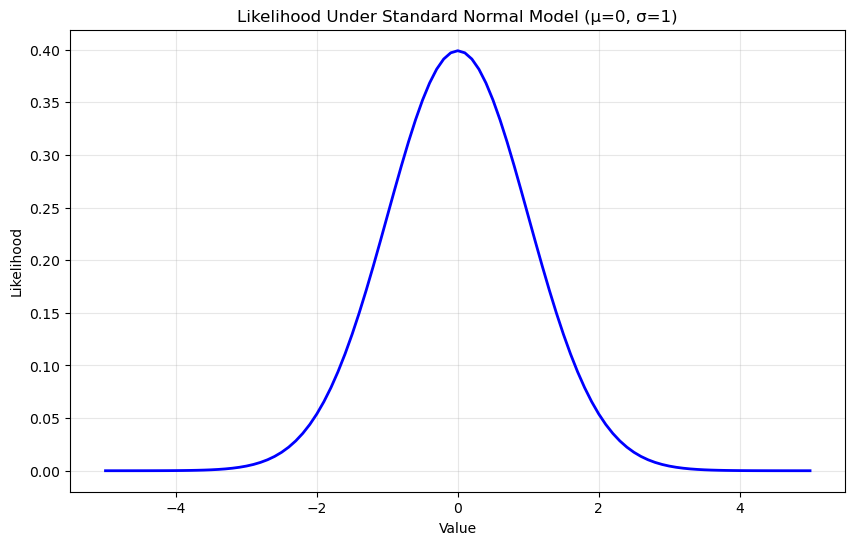

In [2]:
import matplotlib.pyplot as plt

values = np.arange(-5, 5.1, 0.1)
likelihoods = normal_pdf(values, mu=0, sigma=1)

# Plot the likelihood values
plt.figure(figsize=(10, 6))
plt.plot(values, likelihoods, 'b-', linewidth=2)
plt.title('Likelihood Under Standard Normal Model (μ=0, σ=1)')
plt.xlabel('Value')
plt.ylabel('Likelihood')
plt.grid(True, alpha=0.3)
plt.show()

# Discussion: The plot shows a bell-shaped curve (Gaussian/normal distribution) centered at 0.
# The likelihood is highest at the mean (0) and decreases symmetrically as we move away from the mean.
# This is the characteristic shape of a normal distribution.




## Exercise 2: Exploring the Gamma Distribution and the Central Limit Theorem
#### What is the Gamma Distribution?
The Gamma distribution is a two-parameter family of continuous probability distributions. It is often used to model waiting times and has a wide range of applications in fields like economics, hydrology, and queuing theory.

The probability density function (PDF) of the Gamma distribution is given by:
 
$f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} \quad \text{for } x > 0$

Where:
- $\alpha > 0$ is the shape parameter.
- $\beta > 0$ is the rate parameter.
- $\Gamma(\alpha)$ is the Gamma function.

#### Modeling the Time Between Failures in a System

One common real-life application of the Gamma distribution is in modeling the time between failures of a mechanical system. Imagine a system with several components, each of which has an independent time to failure that follows an exponential distribution. The total time until the failure of $n$ components (where $n>1$) follows a Gamma distribution.

For instance, in the context of aircraft maintenance:

The time until two specific critical components fail could be modeled using a Gamma distribution with $α = 2$ (since the failures are independent and the total time is a sum of two exponential variables) and a rate parameter $β$ corresponding to the failure rate.
This allows engineers to estimate the probability of system failure over time and plan maintenance schedules to reduce risk and increase reliability.

### 2a: Generate and Visualize a sample of gamma-distributed observations

i. Simulate $n=1000$ instances of time (in hours) between critical component failures of an aircraft, assuming the aircraft has $3$ components which fail at a rate of $1$ every 15 minutes of flight (hint: translate the rate of failure in hours before simulating. For simulating the instances you can use np.random.gamma).

ii. Plot a histogram of the sample (use density = True to show probability density).

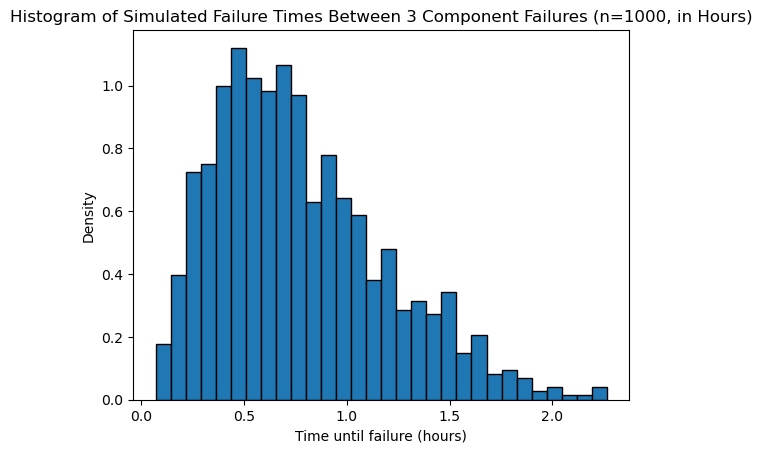

In [3]:
# Parameters for the new simulation
# 3 components, rate of 1 failure every 15 minutes = 4 failures per hour
# For Gamma distribution: alpha = number of components = 3, beta = rate = 4 per hour
alpha = 3
beta = 4  # rate parameter (failures per hour)
scale = 1 / beta  # scale parameter for np.random.gamma (scale = 1/rate)
n = 1000
instances = np.random.gamma(alpha, scale=scale, size=n)

plt.hist(instances, bins=30, density=True, edgecolor='black')
plt.title("Histogram of Simulated Failure Times Between 3 Component Failures (n=1000, in Hours)")
plt.xlabel('Time until failure (hours)')
plt.ylabel('Density')
plt.show()




### 2b: Analyze Distribution Properties

Using the sample generated, calculate the following:
 
1. **Mean:** The average value of the sample.
2. **Standard Deviation:** Measure of spread around the mean.
3. **Variance:** Square of the standard deviation.
4. **Skewness:** Measure of asymmetry of the distribution.

#### Hints:
- Use `np.mean`, `np.std`, and `np.var` for mean, standard deviation, and variance.
- Use `scipy.stats.skew` for skewness.

In [4]:
from scipy.stats import skew

mean = np.mean(instances)
std = np.std(instances)
variance = np.var(instances)
skewness = skew(instances)

print("mean = ", mean)
print("standard deviation = ", std)
print("variance = ", variance)
print("skewness = ", skewness)





mean =  0.7741153144348214
standard deviation =  0.4121866513659095
variance =  0.16989783556424182
skewness =  0.7850827147336846


# Gamma Distribution Summary

- **Mean:**  
  The mean of the Gamma distribution is given by:  
  
  $\mu = \frac{\alpha}{\beta}$  

- **Variance:**  
  The variance measures the spread of the data and is given by:  
  
  $\text{Var}(X) = \frac{\alpha}{\beta^2}$

- **Standard Deviation:**  
  The standard deviation, which is the square root of the variance, is:  
  
  $\sigma = \frac{\sqrt{\alpha}}{\beta}$  

- **Skewness:**  
  Skewness measures the asymmetry of the distribution. For the Gamma distribution, the skewness is:  
  
  $\text{Skewness} = \frac{2}{\sqrt{\alpha}}$
    
  A positive skewness indicates a longer right tail, which is typical for the Gamma distribution.


### 2c: Central Limit Theorem in Action

The Gamma distirbution is skewed - let's look at whether the sample mean of Gamma distributed variables follows a normal distribution, as the CLT suggests. For the following use the Gamma parameters we defined previously. 

Your task is to first generate a function that takes *sample size* and *number of desired samples* as input. The former describes the size of a given sample you want to generate (the number of observations) whilst the latter describes how many such samples you want to see. The output of the function should be a vector of sample means, one for each of the desired samples. (use the same shape and rate as in 2a)

Set the default number of desired samples to $1000$. 

Run a loop to iterate across different sample sizes, namely [1,5,10,30,100,1000,10000], and for each set of samples of a given size plot the histogram of the sample mean. Does the CLT hold ? at what sample size can we be confident our means will be normally distributed \? 

(NOTE: For the autograde please use variable names "sample_size" and "samples" for your sets of samples)


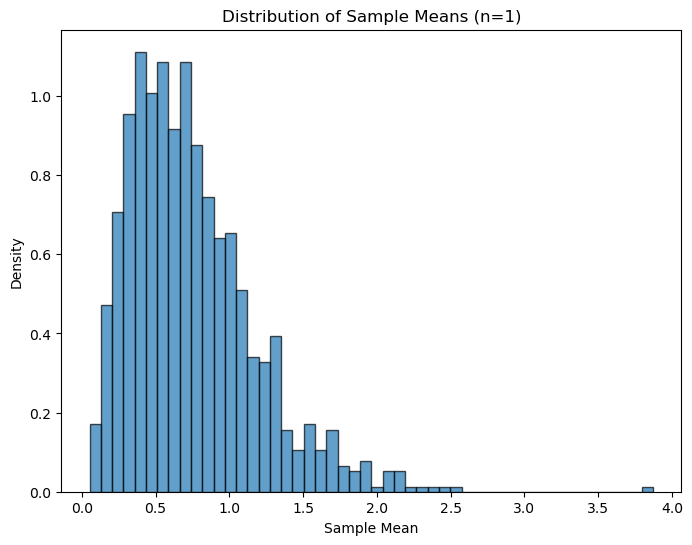

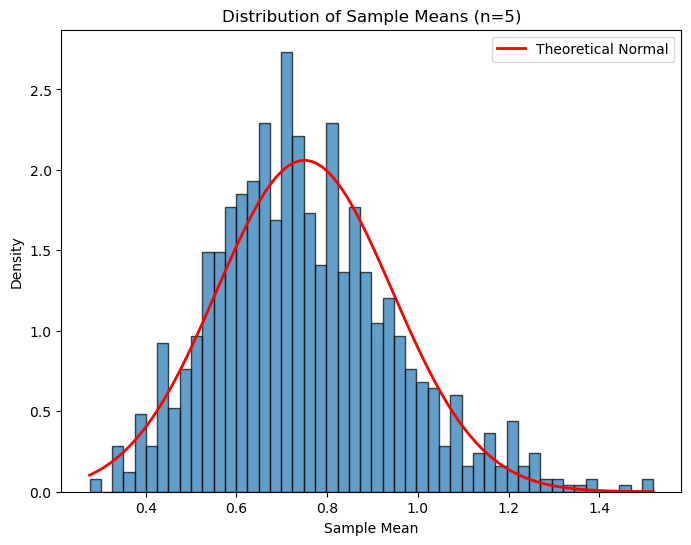

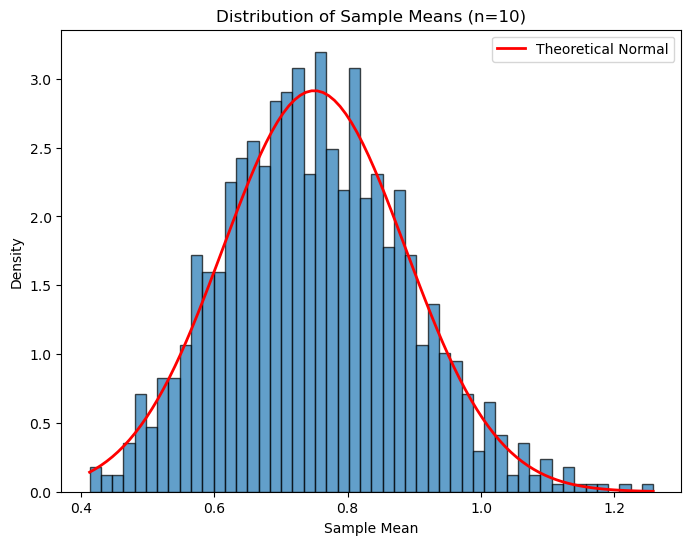

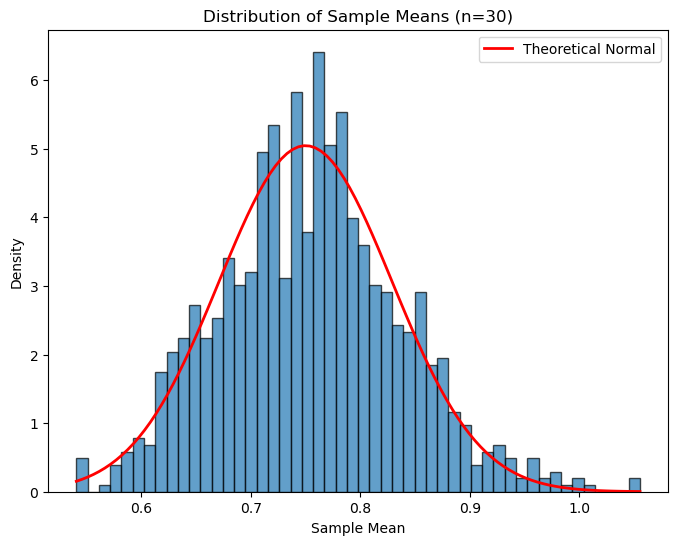

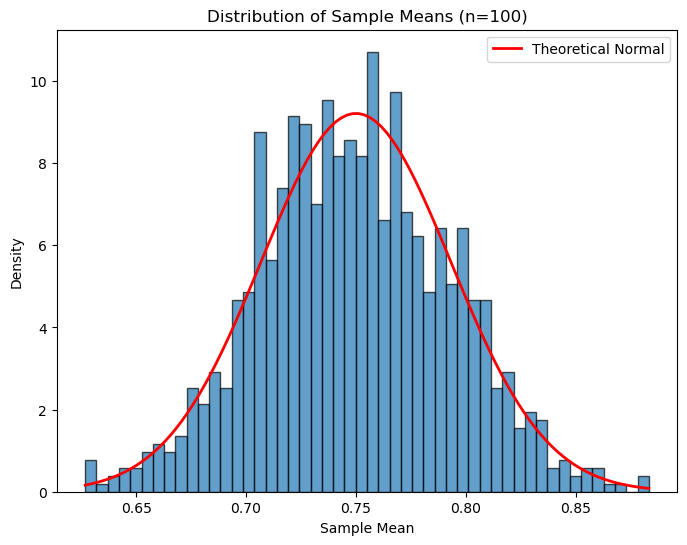

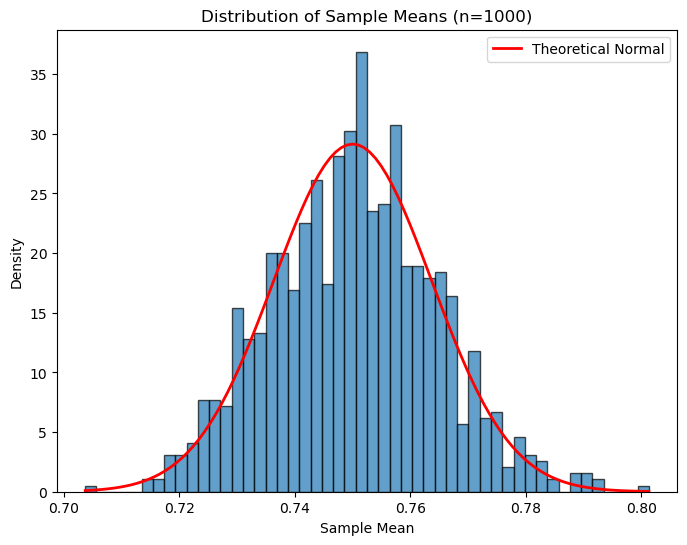

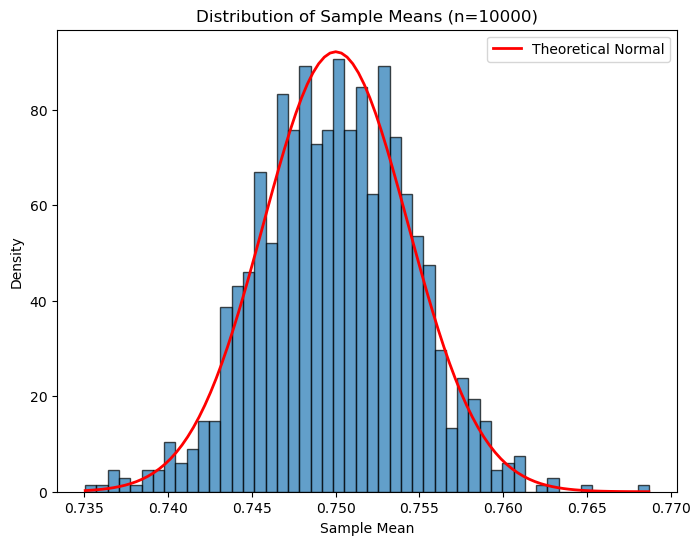

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Define the function to generate sample means
def generate_sample_means(sample_size, num_samples=1000, alpha=3, beta=4):
    """
    Generate sample means from Gamma distribution.
    
    Parameters:
    - sample_size: size of each sample
    - num_samples: number of samples to generate (default 1000)
    - alpha: shape parameter for Gamma distribution
    - beta: rate parameter for Gamma distribution
    
    Returns:
    - Array of sample means
    """
    scale = 1 / beta
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.gamma(alpha, scale=scale, size=sample_size)
        sample_means.append(np.mean(sample))
    return np.array(sample_means)

# Run loop across different sample sizes
sample_sizes = [1, 5, 10, 30, 100, 1000, 10000]
samples = {}  # Store samples for each sample size

for sample_size in sample_sizes:
    samples[sample_size] = generate_sample_means(sample_size, num_samples=1000, alpha=3, beta=4)
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(samples[sample_size], bins=50, density=True, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Sample Means (n={sample_size})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    
    # Overlay theoretical normal distribution if sample size is large enough
    if sample_size > 1:
        theoretical_mean = alpha / beta
        theoretical_std = np.sqrt(alpha / (beta**2)) / np.sqrt(sample_size)
        x = np.linspace(samples[sample_size].min(), samples[sample_size].max(), 100)
        plt.plot(x, norm.pdf(x, theoretical_mean, theoretical_std), 'r-', linewidth=2, label='Theoretical Normal')
        plt.legend()
    
    plt.show()

# Discussion: As sample size increases, the distribution of sample means becomes more normal.
# For small sample sizes (n=1, 5, 10), the distribution is still skewed.
# Around n=30, we start seeing a more normal distribution (CLT approximation).
# For n=100 and above, the distribution is very close to normal.



**Conclusion:**
As the size of the underlying samples increases, the distribution of the sample means becomes more normal (Gaussian), which demonstrates the Central Limit Theorem (CLT). This holds even when the underlying distribution (Gamma in this case) is not normal.

## Exercise 3: Playing with Linear Regression

We will work with the `Time-for-change` regression model to predict the results of the US elections. The goal of the model is to estimate the % of the two-party (Republican + Democrat) vote from 3 variables: the `incumbency` (i.e. whether the incumbent party candidate is seeking re-election or if it's a new candidate) of the president; the growth rate of the economy; and the approval rating of the incumbent party president. 

### Question 3a: Linear Regression Model
Estimate a linear regression model to predict vote share using at least one categorical variable (if applicable) and one numeric variable.

In [6]:
import os
import pandas as pd

# load Historical Election Results dataset
df = pd.read_csv('sem3_topic3_linreg_formative1_data1.csv')
print(df)

      year    state state_po  state_fips  state_cen  state_ic        office  \
0     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
...    ...      ...      ...         ...        ...       ...           ...   
4282  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4283  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4284  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4285  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4286  2020  WYOMING       WY          56         83        68  US PRESIDENT   

                    candidate              party_de

For an excercise later on, I will also add the $1^{st}$ lag of the state-level party past vote. 

In [7]:
# Here we do a little data Wrangling to improve the dataset for analysis

# Focus on Democrats and Republicans only 
df = df[df['party_simplified'].str.contains('DEMOCRAT') | df['party_simplified'].str.contains('REPUBLICAN')]

# Calculate the lagged state-level vote by party
df['pct_2p_vote'] = 100*df['candidatevotes'] / df['totalvotes']

# Group by state_po and party_simplified, then lag the vote share
df['lagged_pct_2p_vote'] = df.groupby(['state_po', 'party_simplified'])['pct_2p_vote'].shift(1)
print(df)

      year          state state_po  state_fips  state_cen  state_ic  \
0     1976        ALABAMA       AL           1         63        41   
1     1976        ALABAMA       AL           1         63        41   
7     1976         ALASKA       AK           2         94        81   
8     1976         ALASKA       AK           2         94        81   
11    1976        ARIZONA       AZ           4         86        61   
...    ...            ...      ...         ...        ...       ...   
4264  2020  WEST VIRGINIA       WV          54         55        56   
4267  2020      WISCONSIN       WI          55         35        25   
4268  2020      WISCONSIN       WI          55         35        25   
4280  2020        WYOMING       WY          56         83        68   
4281  2020        WYOMING       WY          56         83        68   

            office            candidate party_detailed writein  \
0     US PRESIDENT        CARTER, JIMMY       DEMOCRAT   False   
1     US PRESID

Here I want to include in this dataset the necessary tools to perform the `time for change` model. 

I need to augment the dataset with:

a) the `incumbency` of the party / president ; 

b) the real GDP growth in the year of the election; 

c) the `approval rating` of the incumbent president on the eve of the election. 

In [8]:
# define a function that returns the incumbent and whether the incumbent party is seeking their 2nd term in office
def identify_incumbent_complete(year):
    if year in [1976]:
        return ('REPUBLICAN', 0)  # Ford (Continuing Nixon's term)
    elif year in [1980]:
        return ('DEMOCRAT', 1)  # Carter
    elif year in [1984, 1988]:
        return ('REPUBLICAN', 1 if year == 1984 else 0)  # Reagan
    elif year in [1992]:
        return ('REPUBLICAN', 0)  # H.W. Bush (continuing Republican (Reagan) term)
    elif year in [1996, 2000]:
        return ('DEMOCRAT', 1 if year == 1996 else 0)  # Clinton
    elif year in [2004, 2008]:
        return ('REPUBLICAN', 1 if year == 2004 else 0)  # W. Bush
    elif year in [2012, 2016]:
        return ('DEMOCRAT', 1 if year == 2012 else 0)  # Obama
    elif year in [2020]:
        return ('REPUBLICAN', 1)  # Trump
    else:
        return ('None', 0)  # Default for years without a U.S. presidential election

# Apply the function to each row
df['incumbent_party'] = 'None'
df['term2'] = 0
for index, row in df.iterrows():
    incumbent_party, term2 = identify_incumbent_complete(row['year'])
    df.at[index, 'incumbent_party'] = incumbent_party
    df.at[index, 'term2'] = term2

# Now we can focus on the incumbent party, and focus our analysis to ask `what is the chance that the share of the vote the incmumbent will get ? 
df['incumbent_dummy'] = np.where(df['incumbent_party']==df['party_simplified'],1,0)
df = df[df['incumbent_dummy'] == 1]

# and we only need a few variables 
df = df[['year','state','term2','pct_2p_vote','lagged_pct_2p_vote']]



In [9]:
# augment with national GDP data 
aux_gdp = pd.read_csv('sem3_topic3_linreg_formative1_data3.csv')
aux_gdp = aux_gdp[aux_gdp['Items']=='Gross domestic product']

# melt 
aux_gdp = pd.melt(aux_gdp, id_vars='Items',var_name='year',value_name='real_gdp_pct_growth')
aux_gdp = aux_gdp[['year','real_gdp_pct_growth']]
aux_gdp['real_gdp_pct_growth'] = pd.to_numeric(aux_gdp['real_gdp_pct_growth'])

# merge with df 
df['year'] = df['year'].astype(int)  # Convert to int
aux_gdp['year'] = aux_gdp['year'].astype(int)  # Ensure this matches df
df = pd.merge(df, aux_gdp, on='year', how='left')
print(df)

     year          state  term2  pct_2p_vote  lagged_pct_2p_vote  \
0    1976        ALABAMA      0    42.614871                 NaN   
1    1976         ALASKA      0    57.904575                 NaN   
2    1976        ARIZONA      0    56.366136                 NaN   
3    1976       ARKANSAS      0    34.904337                 NaN   
4    1976     CALIFORNIA      0    49.748314                 NaN   
..    ...            ...    ...          ...                 ...   
609  2020       VIRGINIA      1    43.995504           44.427647   
610  2020     WASHINGTON      1    38.766978           36.832680   
611  2020  WEST VIRGINIA      1    68.631552           68.630575   
612  2020      WISCONSIN      1    48.822437           47.218185   
613  2020        WYOMING      1    69.499790           67.398411   

     real_gdp_pct_growth  
0                    5.4  
1                    5.4  
2                    5.4  
3                    5.4  
4                    5.4  
..                   

In [10]:
# augment with incumbent's approval rating
aux_app = pd.read_csv('sem3_topic3_linreg_formative1_data2.csv')
aux_app['net_approval'] = aux_app['Approving'] - aux_app['Disapproving']

# select only the approval polls right closest to the election
import pandas as pd

def last_approval_before_election(data):
    """
    Selects the last approval poll before each presidential election in the dataset.
    
    :param data: A pandas DataFrame with columns 'Start Date', 'End Date', 'Approving', 'Disapproving', 'Unsure/NoData', and 'net_approval'.
    :return: A pandas DataFrame with the selected polls.
    """
    # Convert date columns to datetime
    data['Start Date'] = pd.to_datetime(data['Start Date'])
    data['End Date'] = pd.to_datetime(data['End Date'])
    
    # Sort the data by 'End Date' to ensure chronological order
    data.sort_values(by='End Date', inplace=True)
    
    # Identify the range of years in the dataset
    start_year = data['End Date'].dt.year.min()
    end_year = data['End Date'].dt.year.max()
    
    # Presidential elections are held every 4 years, starting from 1944
    election_years = [year for year in range(start_year, end_year+1) if year % 4 == 0 and year >= 1944]
    
    selected_polls = []
    for year in election_years:
        # Election date: first Tuesday after the first Monday in November
        # Simplification: use November 1st as a base, then adjust
        base_date = pd.Timestamp(year=year, month=11, day=1)
        day_of_week = base_date.dayofweek
        election_date = base_date + pd.Timedelta(days=(1-day_of_week) % 7 + 1)
        
        # Select the last poll before the election
        last_poll = data[data['End Date'] < election_date].iloc[-1]
        selected_polls.append(last_poll)
    
    return pd.DataFrame(selected_polls)

# apply the function
aux_app = last_approval_before_election(aux_app)

# extract relevant year
aux_app['year'] = aux_app['End Date'].astype(str).str[:4].astype(int)

# drop unnecessary variables 
aux_app = aux_app[['year','net_approval']]

# merge with election results dataset 
df = pd.merge(df, aux_app, on='year', how='left')

In [11]:
# drop missing values due to lagging
df = df.dropna()

# Let's see the results of our effors
print(df)

# Write this to a csv so we can use it in later notebooks
df.to_csv('clean_TFC_data.csv', index=False)

     year          state  term2  pct_2p_vote  lagged_pct_2p_vote  \
51   1980        ALABAMA      1    47.448859           55.727269   
52   1980         ALASKA      1    26.407902           35.653131   
53   1980        ARIZONA      1    28.244684           39.799978   
54   1980       ARKANSAS      1    47.522631           64.961728   
55   1980     CALIFORNIA      1    35.919437           47.954822   
..    ...            ...    ...          ...                 ...   
609  2020       VIRGINIA      1    43.995504           44.427647   
610  2020     WASHINGTON      1    38.766978           36.832680   
611  2020  WEST VIRGINIA      1    68.631552           68.630575   
612  2020      WISCONSIN      1    48.822437           47.218185   
613  2020        WYOMING      1    69.499790           67.398411   

     real_gdp_pct_growth  net_approval  
51                  -0.3           -18  
52                  -0.3           -18  
53                  -0.3           -18  
54                 

### Now we estimate the `time for change` regression

In [12]:
import pandas as pd
# !pip install statsmodels
import statsmodels.api as sm

# TODO Define your design matrix and your target variable and use Ordinary Least Squares (OLS) to fit a model.
# Create dummy variables for 'state' column
# also include term2, real_gdp_pct_growth, net_approval, and lagged_pct_2p_vote as regressors
# predict pct_2p_vote

# Define target variable
y = df['pct_2p_vote'].values

# Create dummy variables for 'state' column
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)

# Create design matrix with numeric variables and state dummies
X = pd.concat([
    df[['term2', 'real_gdp_pct_growth', 'net_approval', 'lagged_pct_2p_vote']],
    state_dummies
], axis=1)

# Add constant term
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     26.81
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.66e-116
Time:                        11:35:47   Log-Likelihood:                -1811.2
No. Observations:                 563   AIC:                             3732.
Df Residuals:                     508   BIC:                             3971.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### b) Inference by `Approximate Posterior` Simulations

Simulate 1000 values from the approximate posterior distribution of each of your coefficients. 

Plot the histogram for each of these coefficient simulations, and calculate: 

i. the proportion of simulation that are above 0; 

ii. the Monte Carlo Median and 95% prediction interval for each coefficient; 

iii. Comment on the significance and magnitude of the effects. 

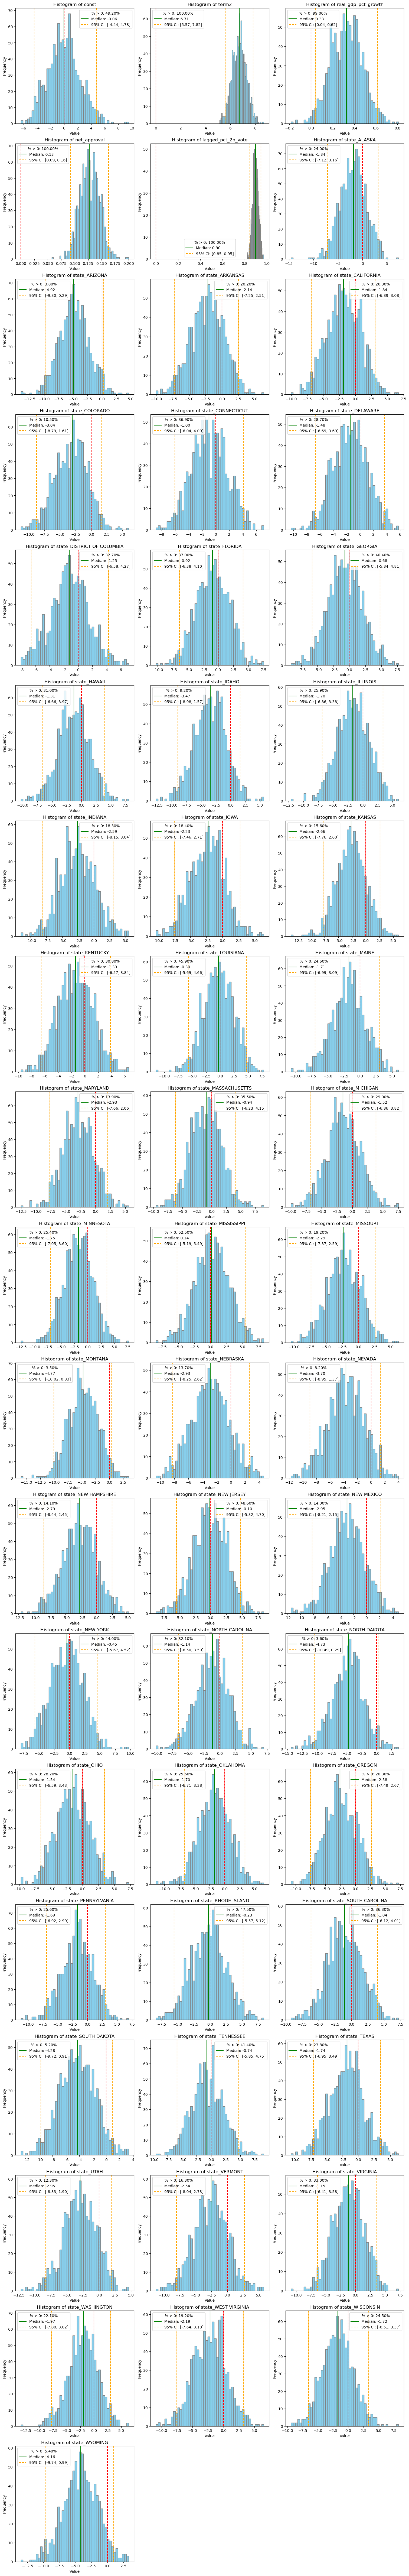

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: Simulate values from empirical posterior distribution of model coefficients. Use the model defined the cell above
# Simulate from multivariate normal distribution using estimated coefficients and covariance matrix
n_simulations = 1000
coeff_samples = np.random.multivariate_normal(
    mean=model.params.values,
    cov=model.cov_params().values,
    size=n_simulations
)

# Extract parameter names dynamically
parameter_names = model.params.index.tolist()
n_params = len(parameter_names)

# Determine rows and columns dynamically
n_cols = min(3, n_params)
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5), constrained_layout=True)
axes_flat = axes.flatten()

for i, name in enumerate(parameter_names):

    # TODO: Calculate the following:
    mean_val = np.mean(coeff_samples[:, i])
    median_val = np.median(coeff_samples[:, i])
    ci_lower = np.percentile(coeff_samples[:, i], 2.5)
    ci_upper = np.percentile(coeff_samples[:, i], 97.5)
    percent_positive = 100 * np.mean(coeff_samples[:, i] > 0)

    ax = axes_flat[i]
    ax.hist(coeff_samples[:, i], bins=50, color='skyblue', edgecolor='gray')
    ax.axvline(x=median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.axvline(x=ci_lower, color='orange', linestyle='--', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
    ax.axvline(x=ci_upper, color='orange', linestyle='--')
    ax.axvline(x=0, color='red', linestyle='--')
    ax.set_title(f'Histogram of {name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(title=f'% > 0: {percent_positive:.2f}%')

# Hide unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.show()




### c) Generate Predicted Values and Estimate Statistics

For each record in your dataset, generate predicted values. 

Fitted values are simply $\hat{\mu} = \hat{\beta}X$, so the expected values generated are just the linear combination of coefficients and predictors.

Use the package which you are using for fitting the regression model to output 

a) point estimates for each fitted value; 

b) the standard deviation of the distribution of those estimates. 

Use these to generate $1000$ samples from the approximate posterior distribution of the fitted values, and estimate the Monte Carlo Median and the $95%$ prediction interval.

(NOTE: For the autograde please use the variable names "new_predictions", "fitted_value_samples", "monte_carlo_medians" and "prediction_intervals".)

In [14]:
import statsmodels.api as sm
import numpy as np

# Design matrix with intercept (assuming model has one)
X_new_with_const = sm.add_constant(X)

# a) Point estimates for each fitted value
new_predictions = model.predict(X_new_with_const)

# b) Standard deviation of the distribution of those estimates
# Get the standard errors of fitted values
fitted_std = model.get_prediction(X_new_with_const).se_mean

# Generate 1000 samples from the approximate posterior distribution of fitted values
n_samples = 1000
fitted_value_samples = np.zeros((n_samples, len(new_predictions)))

for i in range(n_samples):
    # Sample coefficients from posterior
    sampled_coeffs = np.random.multivariate_normal(
        mean=model.params.values,
        cov=model.cov_params().values
    )
    # Calculate fitted values with sampled coefficients
    fitted_value_samples[i, :] = X_new_with_const @ sampled_coeffs

# Estimate Monte Carlo Median and 95% prediction interval
monte_carlo_medians = np.median(fitted_value_samples, axis=0)
prediction_intervals = np.percentile(fitted_value_samples, [2.5, 97.5], axis=0)



### d) Plot Observed vs. Predicted Values with Prediction Intervals

Plot the observed values (on the y-axis) against the Monte Carlo Median of the fitted values (x-axis) for each observation. On the same plot, find a way to add the prediction intervals around your fitted values. Make sure the y and x axis span the same support, and add a y = x line to the plot. Comment on what the plot shows - does your model recover good predictions ? How can you tell ? Play around with your model and look how including / removing complexity changes the performance. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate metrics
correlation = np.corrcoef(monte_carlo_medians, y)[0, 1]
rmse = np.sqrt(mean_squared_error(y, monte_carlo_medians))
bias = np.mean(monte_carlo_medians - y)
coverage = np.mean((y >= prediction_intervals[0, :]) & (y <= prediction_intervals[1, :]))

# Calculate min and max for plot limits directly
min_val = min(y.min(), monte_carlo_medians.min())
max_val = max(y.max(), monte_carlo_medians.max())

In [16]:
rmse

6.037287832821909

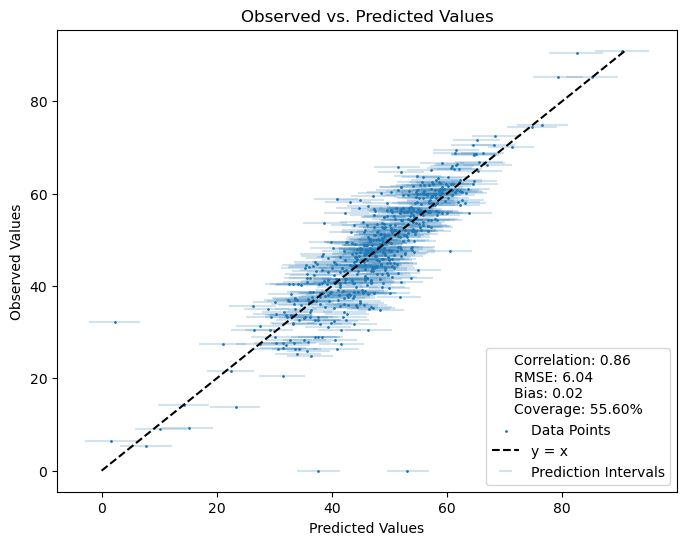

In [17]:
# Plotting

#!#  BEGIN SOLUTION

plt.figure(figsize=(8, 6))
plt.scatter(monte_carlo_medians, y, s=1, alpha=1, label='Data Points')
plt.errorbar(
    monte_carlo_medians,
    y,
    xerr=[monte_carlo_medians - prediction_intervals[0, :], prediction_intervals[1, :] - monte_carlo_medians],
    fmt='none',
    alpha=0.2,
    label='Prediction Intervals'
)
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='y = x')

# Add metrics to legend
legend_text = (
    f'Correlation: {correlation:.2f}\n'
    f'RMSE: {rmse:.2f}\n'
    f'Bias: {bias:.2f}\n'
    f'Coverage: {coverage:.2%}'
)
plt.legend(title=legend_text, loc='lower right')

# Labeling
plt.title('Observed vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')

# Display plot
plt.show()

#!# END SOLUTION